<center>
# Algèbre linéaire randomisée (suite)

In [66]:
%matplotlib inline
from math import *
import numpy as  np  
import scipy as sp
from pylab import *


# Exercice 1

Soit $n = 2^d.$ La transformation SRHT de $\mathbb{R}^n$ dans $\mathbb{R}^k$ est définie par 
$$
S = PHD 
$$
où $D \in \mathbb{R}^{n\times n}$ est une matrice diagonale dont les entrées sont des v.a. de Rademacher indépendantes, $H \in \mathbb{R}^{n\times n}$ est la matrice de Hadamard, et $P = \sqrt{\frac{n}{k}} B$ où $B$ est une matrice aléaroire telle que $Bx$ est un sous-ensemble de $k$ composantes de $x$ tirées au hasard et avec remplacement.  


>**Question 1.** Créer une fonction <code>Hadamard_Transform(x)</code> qui prend en argument un vecteur $x$ et qui retourne sa transformée de Hadamard $Hx$. 

>**Question 2.** Créer une fonction <code>SRHT(x,k)</code> qui prend en argument un vecteur $x$ et un entier $k$ et qui retourne le vecteur $PHDx$.

>**Question 3.** On considère un vecteur $x\in\mathbb{R}^n$ tiré aléatoirement selon la loi gaussienne standard, avec $d=20$. Pour $\epsilon=0.1$ et pour $k=10$ et $100$, 
estimer la probabilité que $\vert \Vert Sx \Vert_2^2 - \Vert x \Vert_2^2 \vert > \epsilon \Vert x \Vert_2^2$, et  la probabilité que $\vert \Vert Px \Vert_2^2 - \Vert x \Vert_2^2 \vert > \epsilon \Vert x \Vert_2^2$.  
Pour chaque cas, on estimera la probabilité en calculant la fréquence de l'événement sur $N_s=1000$.

>**Question 4.** Reprendre la question précédente avec un vecteur $x$ qui contient $p$ composantes non nulles toutes égales à $1/\sqrt{p}$. On testera les valeurs $p=2^l$ pour $l=0,...,d$.

# Exercice 2

Soit $A\in \mathbb{R}^{n\times m}$. On considère l'approximation du produit matriciel $A^TA$ par la matrice $(SA)^T(SA)$ où $S$ est une matrice aléatoire. On considère les matrices aléatoires $S \in \mathbb{R}^{k\times n}$ suivantes:
* les entrées de $S$ sont i.i.d. et suivent la loi gaussienne $\mathcal{N}(0,\frac{1}{k})$,
* les lignes de $S$ sont indépendantes et la ligne $i$ contient une seule composante non nulle  située à la position $j$, tirage aléatoire d'une variable $J$ à valeurs dans $\{1,\dots,n\}$ et de loi $\mathbb{P}(J=j)=p_j$. La valeur de cette composante non nulle est $\frac{1}{\sqrt{k p_j}}$.   

Dans le cas du sampling, quel que soit $p$, $(SA)^T(SA)$ est un estimateur sans biais de $A^TA$. La variance de cet estimateur est minimale pour $p_i = p_i^{opt} = \Vert a_i \Vert^2_2/\Vert A \Vert_F^2$ où $a_i$ est la ligne $i$ de $A$.  

>**Question 1.** Créer les fonctions <code>projection_gaussian(A,k)</code> et <code>projection_sampling(A,k,p)</code> qui prennent pour arguments une matrice $A \in \mathbb{R}^{n \times m}$, un entier $k$ (et un vecteur $p$ de taille $n$ pour le deuxième cas), et qui renvoient une réalisation de $SA \in \mathbb{R}^{k\times m}$ pour les deux cas de matrices aléatoires considérés. On utilisera <code>(n,m) = A.shape</code> pour obtenir les dimensions de $A$.

In [72]:
def projection_gaussian(A, k):
    (n,m) = A.shape
    S = 1. / sqrt(k) * np.random.randn(m,n)
    return np.dot(S, A)
    

def projection_sampling(A, k, p):
    (n,m) = A.shape
    I = np.random.choice(range(n), k, replace=True, p=p)
    SA = np.zeros((m,n))
    SA = A[I, :] / sqrt(k)
    for i in range(k):
        SA[i, :] = A[I[i], :] / sqrt(k*p[I[i]])
    return SA

>**Question 2.** On note $$E(A,B) = \frac{ \Vert A^TA - B^TB\Vert_F }{ \Vert A \Vert_F^2}.$$ Créer une fonction <code>error</code> qui prend deux matrices $A$ et $B$ en arguments et qui revoie $E(A,B)$. 

In [73]:
def error(A, B):
    return np.abs(np.linalg.norm(np.dot(np.transpose(A), A) - np.dot(np.transpose(B), B), 'fro')) / np.power(np.linalg.norm(A, 'fro'), 2)

>**Question 3.** Générer une réalisation de la matrice $A \in \mathbb{R}^{n\times m}$ telle que 
$$
A_{ij} = \exp\left(-\frac{1}{0.05^2}\left(\frac{i-1}{n}-X_j)\right)^2\right)Y_{ij}
$$
avec $n=1000$ et $m=250$, où les $X_j$ et $Y_{ij}$ sont indépendantes, $X_j \sim U(0,1)$ et $Y_{ij} \sim \mathcal{N}(0,1)$.

In [74]:
n = 1000
m = 250

A = np.zeros((n, m))
for j in range(m):
    xj = np.random.rand()
    for i in range(n):
        A[i, j] = np.exp( -1./.05**2*((i- 1)/n - xj)**2 )*np.random.randn()
print(np.linalg.norm(A))

124.719076067


>**Question 4.** On compare ici la projection avec matrice gaussienne, la projection par sampling de loi uniforme $p_i = \frac{1}{n}$, et la projection par sampling optimal $p_i = p_i^{opt}.$ Pour chaque cas, effectuer $N_s=100$ simulations de l'erreur $E(A,SA)$ et tracer les boxplots de cette erreur sur un même graphique. On testera pour les valeurs de $k=25,50,100,200$.

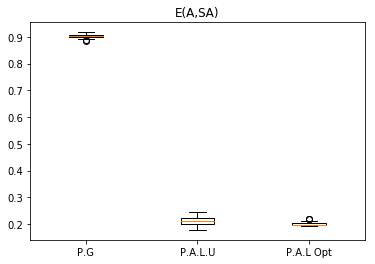

In [77]:
Ns = 101
k = 10
cas = ["P.G", "P.A.L.U", "P.A.L Opt"]

err1 = np.zeros(Ns)
err2 = np.zeros(Ns)
err3 = np.zeros(Ns)

punif = np.ones(n) / n
popt = [np.linalg.norm(A[i, :])**2 for i in range(n) ]
popt = popt / sum(popt)

for l in range(Ns):
    err1[l]=error(A,projection_gaussian(A, k))
    err2[l]=error(A,projection_sampling(A, k, punif))
    err3[l]=error(A,projection_sampling(A, k, popt))

boxplot([err1, err2, err3], labels = cas)
title("E(A,SA)")

# Exercice 3

On considère un problème de régression par moindres carrés.  
Soit $Y = f(X) + \epsilon$ où $X$ est une variable aléatoire uniforme sur $(0,1)$ et $\epsilon$ est une variable gaussienne $\mathcal{N}(0,\sigma^2)$. On prendra $f(x) = \cos(\pi x)/2 + \exp(x)$ et $\sigma=10$. 

On dispose d'un échantillon $x = (x_1,\dots,x_n)$ de $X$ et d'un échantillon correspondant $y = (y_1,\dots,y_n)$ de $Y$, où $y_i = f(x_i) + \epsilon_i$.  
On souhaite constuire une approximation de $f(x)$ par un polynôme $g(x) = \sum_{j=0}^p a_j \varphi_j(x)$ où $\varphi_j(x) = x^j.$ L'approximation par moindres carrés conduit à un vecteur de coefficients $a$ solution de 
$$
\min_{a \in \mathbb{R}^{p+1}} \Vert Aa - y \Vert_2^2
$$
où $A\in \mathbb{R}^{n\times (p+1)}$ est telle que $A_{ij} = \varphi_j(x_i).$ 
 
On considère également la solution $a_S$ du problème aux moindres carrés randomisé
$$
\min_{a \in \mathbb{R}^{p+1}} \Vert S(Aa - y) \Vert_2^2
$$
où $S\in \mathbb{R}^{k\times n}$ est une matrice aléatoire. On considérera ici une matrice gausienne à entrées i.i.d. et $\mathcal{N}(0,1/k)$. 


>**Question 1.** Créer une fonction <code>f(x)</code> qui prend en argument un vecteur <code>x</code> de réalisations $x_i$ de $X$ et qui renvoie un vecteur de même taille contenant les valeurs $f(x_i)$.

In [78]:
def f(x):
    return np.array( cos(pi*x)/2 + exp(x))

>**Question 2.** Créer une fonction <code>phi(x,p)</code> qui prend en arguments un vecteur <code>x</code> de réalisations de $X$ et un entier $p$ et qui renvoie la matrice $A$.

In [80]:
def phi(x, p):
    n = x.size
    A = np.zeros((n, p+1))
    for i in range(n):
        for j in range(p+1):
            A[i, j] = x[i]**j
    return A

>**Question 3.** Créer une fonction <code>least_squares(B,b)</code> qui prend en entrée une matrice $B$ et un vecteur $b$ et qui renvoie $a = (B^TB)^{-1}(B^Tb)$. 

In [81]:
def least_square(B,b):
    a = np.linalg.solve(np.dot(np.transpose(B), B), np.dot(np.transpose(B), b))
    return(a)

>**Question 4.** Générer un vecteur <code>x</code> de $n=100$ réalisations de $X$ et un vecteur <code>y</code> de $n=100$ réalisations correspondantes de $Y$ (échantillon d'apprentissage).    

In [87]:
n = 100
p = 15
x = np.random.rand(n)
y =f(x) + np.random.randn(n) / n

>**Question 5.** Calculer la solution $a$ du problème aux moindres carrés.  
Calculer la solution $a_S$ du problème aux moindres carrés randomisé avec $S \in \mathbb{R}^{k\times n}.$  
Calculer la solution $\tilde a$ du problème aux moindres carrés basés sur les $k$ premiers échantillons.  
On testera les valeurs de $k=30, 100$.   
Tracer sur une même figure la fonction de $f$ et les trois approximations $g$, $\tilde g$ et $g_S$ associées aux coefficients $a$, $\tilde a$ et $a_S$.
Construire un vecteur <code>xtest</code> de $1000$ réalisations de $X$ et un vecteur <code>ytest</code> de $1000$ réalisations correspondantes de $Y$ (échantillon test) et  estimer l'erreur $L^2$ relative pour chaque approximation $g$, $\tilde g$ et $g_S$.



Erreur test LS 0.00246823512845
Erreur test LS k echantillon 0.00713947616837
Erreur test LS Randomized 0.00595182990447


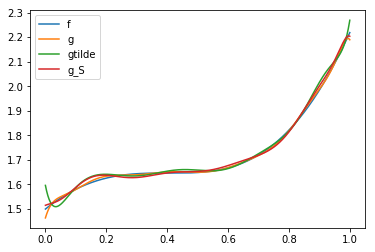

In [93]:
k = 30
A = phi(x, p)

a = least_square(A, y)

atilde = least_square(A[0:k-1,:], y[0:k-1])
S = np.random.randn(k, n)/sqrt(k)
SA = np.dot(S, A)
Sy = np.dot(S, y)
aS = least_square(SA, Sy)
xplot = np.linspace(0, 1, 1000)
plot(xplot, f(xplot))

plot(xplot, np.dot(phi(xplot, p), a))
plot(xplot, np.dot(phi(xplot, p), atilde))
plot(xplot, np.dot(phi(xplot, p), aS))

legend(["f", "g", "gtilde", "g_S"])

ntest = 100
xtest = np.random.rand(ntest)
ytest = f(xtest)

error_test_a = np.linalg.norm(ytest - np.dot(phi(xtest, p),a)) / np.linalg.norm(ytest)
error_test_atilde = np.linalg.norm(ytest - np.dot(phi(xtest, p),atilde)) / np.linalg.norm(ytest)
error_test_aS = np.linalg.norm(ytest - np.dot(phi(xtest,p), aS)) / np.linalg.norm(ytest)

print("Erreur test LS", error_test_a)
print("Erreur test LS k echantillon", error_test_atilde)
print("Erreur test LS Randomized", error_test_aS)
